# Proyek Analisis Data: Air Quality dataset
- Nama: Dinda Nuroktaviani
- Email: dindanuroktavia@gmail.com
- Id Dicoding: dinda_nino

- Bagaimana konsentrasi polutan udara dalam rentang tahun 2013 s/d 2017?
- Bagaimana konsentrasi polutan udara pada setiap stasiunnya?

## Menyiapkan semua library yang dibutuhkan

In [79]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

### 1. Melihat direktori dalam path

In [80]:
path = '/Users/dinda/Downloads/Air-quality-dataset/PRSA_Data_20130301-20170228'

os.listdir(path)

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

### 2. Menggabungkan beberapa csv file menjadi satu

In [81]:
csv_list = []

file_list = [path + '/' + file for file in os.listdir(path) if file.startswith('PRSA_Data')]

for file in sorted(file_list):
    csv_list.append(pd.read_csv(file))
    
csv_merged = pd.concat(csv_list, ignore_index = True)

csv_merged.to_csv('PRSA_Data_Merged.csv', index = False)

### 3. Membaca csv file yang sudah dimerge

In [82]:
file = '/Users/dinda/Downloads/PRSA_Data_Merged.csv'

df = pd.read_csv(file)
df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


### Assessing Data

### 1. Memeriksa tipe data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


### 2. Memeriksa jumlah missing value

In [84]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

### 3. Memeriksa duplikasi data

In [85]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

### 1. Filtering contoh data missing value

In [86]:
df[df.CO.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420709,35006,2017,2,26,13,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
420731,35028,2017,2,27,11,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
420732,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
420733,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong


### 2. Missing value yang bertipe numerik diimputasi oleh nilai median

In [87]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace = True)
df['SO2'].fillna(df['SO2'].median(), inplace = True)
df['NO2'].fillna(df['NO2'].median(), inplace = True)
df['CO'].fillna(df['CO'].median(), inplace = True)
df['O3'].fillna(df['O3'].median(), inplace = True)
df['TEMP'].fillna(df['TEMP'].median(), inplace = True)
df['PRES'].fillna(df['PRES'].median(), inplace = True)
df['DEWP'].fillna(df['DEWP'].median(), inplace = True)
df['RAIN'].fillna(df['RAIN'].median(), inplace = True)
df['WSPM'].fillna(df['WSPM'].median(), inplace = True)

### 3. Missing value yang bertipe kategorik diimputasi oleh data yang terbanyak

In [88]:
df['wd'] = df['wd'].fillna(df['wd'].value_counts().index[0])

### 4. Memeriksa data yang sudah dibersihkan missing valuenya

In [89]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### 5. Menghapus kolom Nomor

In [90]:
df = df.drop(['No'], axis=1)

### 6. Menggabungkan data time

In [91]:
col_to_date = ['year', 'month', 'day', 'hour']

df['date'] = pd.to_datetime(df[col_to_date])

### 7. Melihat dataframe yang sudah dibersihkan

In [92]:
df.head(10)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
5,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01 05:00:00
6,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,2013-03-01 06:00:00
7,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,2013-03-01 07:00:00
8,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,2013-03-01 08:00:00
9,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,2013-03-01 09:00:00


## Exploratory Data Analysis (EDA)

### 1. Melihat Parameter Statistik

In [93]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.539885,1010.746658,2.491405,0.064416,1.729461,2015-03-01 11:30:00.000001024
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00
75%,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.430768,10.469168,13.787252,0.820626,1.245947,NaN


### 2. Konsentrasi Polutan Udara setiap tahun

In [94]:
df.groupby(by="year").agg({
    "PM2.5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
})

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,79.690762,102.643632,19.811372,52.306097,1158.959048,56.781579
2014,84.743827,115.363450,20.395507,54.199469,1245.319635,57.780836
2015,79.128489,103.328938,12.923995,48.083699,1252.036720,58.979411
2016,71.567642,94.408916,9.747913,46.319169,1133.563866,57.098721
2017,92.090631,110.728166,17.976401,57.114995,1581.591337,39.995468


### 3. Parameter atmosfer setiap tahun

In [95]:
df.groupby(by="year").agg({
    "TEMP" : "mean",
    "PRES" : "mean",
    "DEWP" : "mean",
    "RAIN" : "mean",
    "WSPM" : "mean"
})

,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,
2013,15.689826,1007.734572,5.473082,0.066097,1.599129
2014,13.915842,1010.641436,2.742042,0.049793,1.637802
2015,13.435780,1011.115541,2.629642,0.075997,1.771572
2016,13.575369,1011.224441,2.161314,0.075975,1.844674
2017,0.487422,1021.773663,-13.330944,0.002813,1.997252


### 4. Konsentrasi Polutan Udara masing-masing stasiun

In [96]:
df.groupby(by="station").agg({
    "PM2.5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
})

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,82.040934,109.485803,17.099223,58.830107,1244.561887,55.796764
Changping,70.744359,94.447773,14.816361,44.159599,1141.357061,57.717103
Dingling,65.745349,83.707175,11.650766,28.127947,904.615132,67.733070
Dongsi,85.527068,109.889839,18.313073,53.210913,1290.857090,56.979406
Guanyuan,82.442642,108.692679,17.447772,57.621578,1252.731776,55.433916
Gucheng,83.320534,118.461442,15.245193,55.625870,1307.034309,57.430945
Huairou,69.228839,91.272559,11.978411,32.988181,1017.584417,59.338082
Nongzhanguan,84.304073,108.652398,18.540560,57.799225,1309.754991,58.339367
Shunyi,78.853887,98.475451,13.329130,43.873484,1169.233003,54.768120


### 5. Parameter Atmosfer masing-masing stasiun

In [97]:
df.groupby(by="station").agg({
    "TEMP" : "mean",
    "PRES" : "mean",
    "DEWP" : "mean",
    "RAIN" : "mean",
    "WSPM" : "mean"
})

,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,
Aotizhongxin,13.585130,1011.846095,3.123049,0.067383,1.708373
Changping,13.687341,1007.764042,1.507906,0.060278,1.853280
Dingling,13.687341,1007.764042,1.507906,0.060278,1.853280
Dongsi,13.671962,1012.546194,2.447907,0.063983,1.860601
Guanyuan,13.585130,1011.846095,3.123049,0.067383,1.708373
Gucheng,13.865449,1008.831831,2.611154,0.064374,1.343378
Huairou,12.448414,1007.602802,2.239921,0.067833,1.651668
Nongzhanguan,13.671962,1012.546194,2.447907,0.063983,1.860601
Shunyi,13.389587,1013.058066,2.466014,0.061006,1.807021


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana konsentrasi polutan udara dalam rentang tahun 2013 s/d 2017?

#### 1. Dataframe Konsentrasi polutan semua stasiun tiap tahun

In [98]:
air_polution_yearly_df = df.groupby("year").agg({
    "PM2.5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
})
air_polution_yearly_df

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,79.690762,102.643632,19.811372,52.306097,1158.959048,56.781579
2014,84.743827,115.363450,20.395507,54.199469,1245.319635,57.780836
2015,79.128489,103.328938,12.923995,48.083699,1252.036720,58.979411
2016,71.567642,94.408916,9.747913,46.319169,1133.563866,57.098721
2017,92.090631,110.728166,17.976401,57.114995,1581.591337,39.995468


#### 2. Transformasi wide data menjadi long data untuk mempermudah visualisasi PM

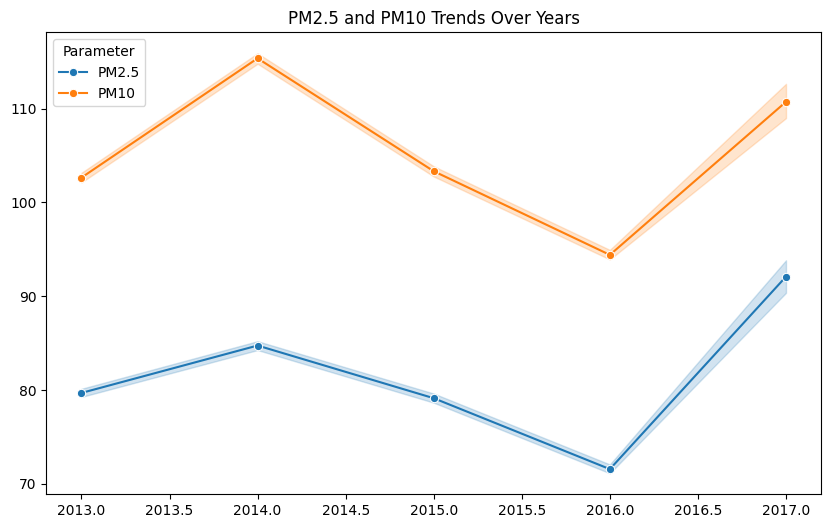

In [99]:
df_melted1 = df.melt(id_vars=['year'], value_vars=['PM2.5', 'PM10'], var_name='Parameter', value_name='Value')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Value', hue='Parameter', marker='o', data=df_melted1)
plt.title('PM2.5 and PM10 Trends Over Years')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### 3. Transformasi wide data menjadi long data untuk mempermudah visualisasi Other polutants

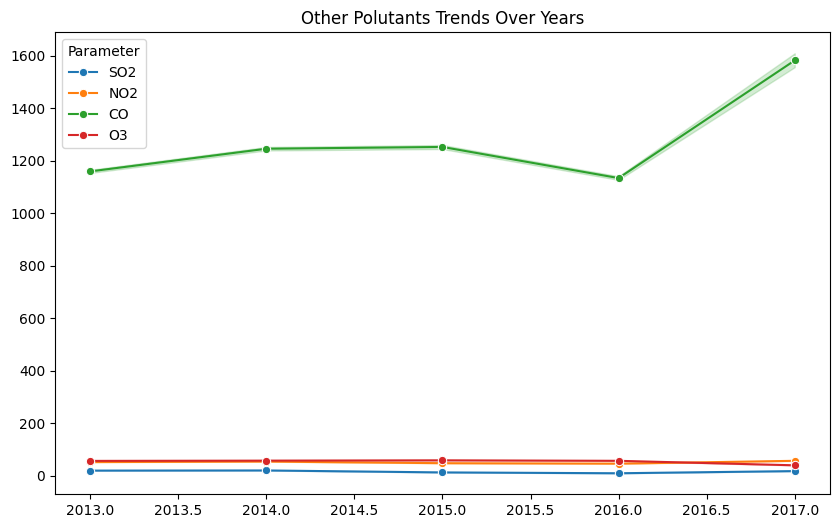

In [100]:
df_melted2 = df.melt(id_vars=['year'], value_vars=['SO2', 'NO2', 'CO','O3'], var_name='Parameter', value_name='Value')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Value', hue='Parameter', marker='o', data=df_melted2)
plt.title('Other Polutants Trends Over Years')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Pertanyaan 2: Bagaimana konsentrasi polutan udara pada setiap stasiunnya?

#### 1. Dataframe rata-rata konsentrasi polutan setiap stasiun

In [101]:
air_polution_station_df = df.groupby("station").agg({
    "PM2.5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
})
air_polution_station_df

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,82.040934,109.485803,17.099223,58.830107,1244.561887,55.796764
Changping,70.744359,94.447773,14.816361,44.159599,1141.357061,57.717103
Dingling,65.745349,83.707175,11.650766,28.127947,904.615132,67.733070
Dongsi,85.527068,109.889839,18.313073,53.210913,1290.857090,56.979406
Guanyuan,82.442642,108.692679,17.447772,57.621578,1252.731776,55.433916
Gucheng,83.320534,118.461442,15.245193,55.625870,1307.034309,57.430945
Huairou,69.228839,91.272559,11.978411,32.988181,1017.584417,59.338082
Nongzhanguan,84.304073,108.652398,18.540560,57.799225,1309.754991,58.339367
Shunyi,78.853887,98.475451,13.329130,43.873484,1169.233003,54.768120


#### 2. Menambahkan sumPM sebagai parameter nilai particulate matter

In [102]:
air_polution_station_df["sumPM"] = air_polution_station_df["PM2.5"]+air_polution_station_df["PM10"]
air_polution_station_df.sort_values(by="sumPM",ascending=False)

,PM2.5,PM10,SO2,NO2,CO,O3,sumPM
station,,,,,,,
Gucheng,83.320534,118.461442,15.245193,55.625870,1307.034309,57.430945,201.781976
Wanshouxigong,84.428174,111.806274,16.954974,55.260130,1352.995351,55.884654,196.234448
Dongsi,85.527068,109.889839,18.313073,53.210913,1290.857090,56.979406,195.416906
Wanliu,83.065591,110.234069,18.189922,64.579548,1297.682609,48.640848,193.299661
Nongzhanguan,84.304073,108.652398,18.540560,57.799225,1309.754991,58.339367,192.956471
Aotizhongxin,82.040934,109.485803,17.099223,58.830107,1244.561887,55.796764,191.526737
Guanyuan,82.442642,108.692679,17.447772,57.621578,1252.731776,55.433916,191.135321
Tiantan,81.640423,105.948856,14.132702,52.947011,1285.512720,55.720215,187.589280
Shunyi,78.853887,98.475451,13.329130,43.873484,1169.233003,54.768120,177.329338


#### 3. Barplot Particulate Matter per Station dari tertinggi sampai terendah

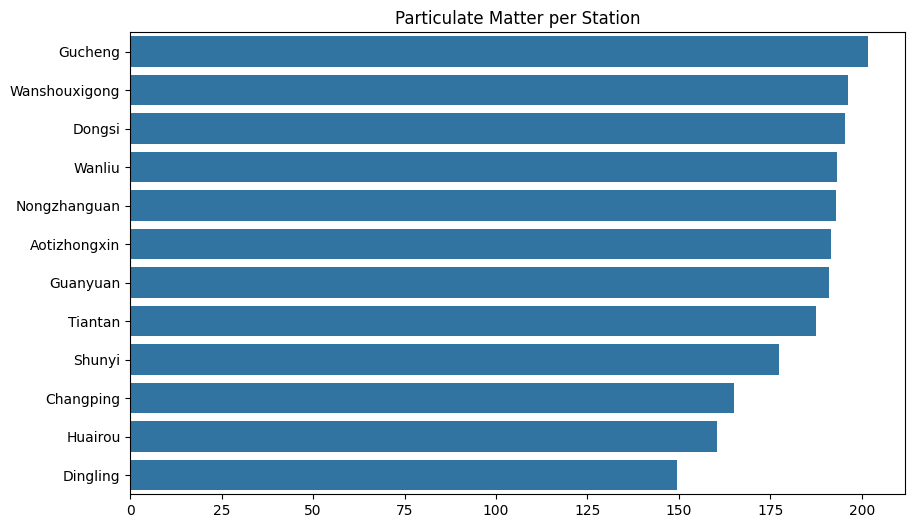

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sumPM", y="station", data=air_polution_station_df.sort_values(by="sumPM",ascending=False))
plt.title('Particulate Matter per Station')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### 4. Barplot CO per station tertinggi sampai terendah (CO saja yang diambil karena fluktuatif setiap tahunnya, dilihat dari trend di atas)

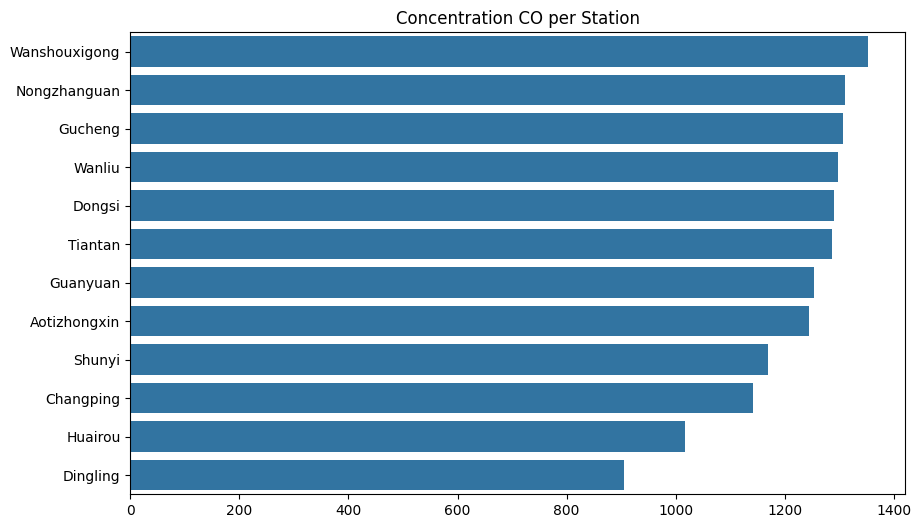

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x="CO", y="station", data=air_polution_station_df.sort_values(by="CO",ascending=False))
plt.title('Concentration CO per Station')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Trend konsentrasi PM2.5 dan PM10 hampir sama, yaitu dari 2013 naik ke 2014, lalu turun hingga 2016 mencapai titik terendah, lalu naik lagi di 2017. Adapun untuk SO2, NO2, dan O3 secara umum konstan, hanya CO yang trennya berbeda yaitu dari 2013-2016 konstan dan meningkat di 2017.
- Conclution pertanyaan 2 : Stasiun dengan konsentrasi PM tertinggi yaitu Gucheng dan terendah yaitu Dingling. Adapun parameter CO yang tertinggi yaitu stasiun Wanshouxigong dan terendah yaitu Dingling.

In [105]:
#menyimpan berkas data yang telah dibersihkan

import pandas as pd
df.to_csv("air_quality_df.csv", index=False)